In [2]:
import pandas as pd
import numpy as np
import dask.dataframe as dd
from dask.diagnostics import ProgressBar

In [6]:
daily_ridership_data = pd.read_csv('./MTA_Daily_Ridership_Data__2020_-_2025_20250413.csv')
daily_ridership_data.tail()

,Date,Subways: Total Estimated Ridership,Subways: % of Comparable Pre-Pandemic Day,Buses: Total Estimated Ridership,Buses: % of Comparable Pre-Pandemic Day,LIRR: Total Estimated Ridership,LIRR: % of Comparable Pre-Pandemic Day,Metro-North: Total Estimated Ridership,Metro-North: % of Comparable Pre-Pandemic Day,Access-A-Ride: Total Scheduled Trips,Access-A-Ride: % of Comparable Pre-Pandemic Day,Bridges and Tunnels: Total Traffic,Bridges and Tunnels: % of Comparable Pre-Pandemic Day,Staten Island Railway: Total Estimated Ridership,Staten Island Railway: % of Comparable Pre-Pandemic Day
1771,01/05/2025,1791020,0.86,618750,0.67,96683,1.17,79761,0.88,23665,1.75,726411,1.06,2039,0.74
1772,01/06/2025,3436491,0.67,1238969,0.61,229503,0.76,202575,0.75,35840,1.27,792617,0.91,6887,0.42
1773,01/07/2025,3781536,0.74,1275936,0.62,245930,0.81,220945,0.82,38048,1.34,842968,0.97,7409,0.45
1774,01/08/2025,3830616,0.74,1256260,0.61,239444,0.79,209550,0.78,39406,1.39,852748,0.98,7798,0.48
1775,01/09/2025,3734383,0.73,787710,0.38,229804,0.76,198894,0.74,38431,1.36,869256,1.00,6841,0.42


In [8]:
# tbh this data is pretty clean as is, thanks MTA :)

len(daily_ridership_data)

1776

In [46]:
%time df_buses_2025 = dd.read_csv('./MTA_Bus_Hourly_Ridership__Beginning_2025_20250413.csv')

CPU times: user 12 ms, sys: 10.8 ms, total: 22.8 ms
Wall time: 22.9 ms


In [48]:
df_buses_2025.head()

,transit_timestamp,bus_route,payment_method,fare_class_category,ridership,transfers
0,03/04/2025 07:00:00 AM,B44,omny,OMNY - Other,2,0
1,03/10/2025 01:00:00 AM,X17,omny,OMNY - Other,0,0
2,03/10/2025 04:00:00 AM,Q60,omny,Metrocard - Other,0,0
3,03/10/2025 10:00:00 AM,B2,omny,OMNY - Other,0,0
4,02/11/2025 05:00:00 PM,Q15,omny,Metrocard - Other,0,0


In [50]:
df_buses_2025 = df_buses_2025[['transit_timestamp', 'bus_route', 'ridership']]

In [52]:
df_buses_2025.head()

,transit_timestamp,bus_route,ridership
0,03/04/2025 07:00:00 AM,B44,2
1,03/10/2025 01:00:00 AM,X17,0
2,03/10/2025 04:00:00 AM,Q60,0
3,03/10/2025 10:00:00 AM,B2,0
4,02/11/2025 05:00:00 PM,Q15,0


In [54]:
df_buses_2025["Date"] = df_buses_2025["transit_timestamp"].str[:10]
df_buses_2025 = df_buses_2025[['Date', 'bus_route', 'ridership']]
df_buses_2025.head()

,Date,bus_route,ridership
0,03/04/2025,B44,2
1,03/10/2025,X17,0
2,03/10/2025,Q60,0
3,03/10/2025,B2,0
4,02/11/2025,Q15,0


In [56]:
df_all_buses_2025 = df_buses_2025.groupby("Date").agg({"ridership": "sum"}).compute()
df_all_buses_2025.head()

,ridership
Date,
02/21/2025,1151958
01/02/2025,1157907
01/16/2025,1331135
01/14/2025,1333682
01/22/2025,1231831


In [58]:
df_all_buses_2025 = df_all_buses_2025.sort_index()
df_all_buses_2025.tail()

,ridership
Date,
03/28/2025,1328914
03/29/2025,926322
03/30/2025,679043
03/31/2025,1200523
04/01/2025,0


In [60]:
df_all_buses_2025 = df_all_buses_2025[:-1]
df_all_buses_2025.tail()

,ridership
Date,
03/27/2025,1422534
03/28/2025,1328914
03/29/2025,926322
03/30/2025,679043
03/31/2025,1200523


In [62]:
%time df_subways_2025 = dd.read_csv('./MTA_Subway_Hourly_Ridership__Beginning_2025_20250413.csv')

CPU times: user 12.4 ms, sys: 7.15 ms, total: 19.5 ms
Wall time: 19.9 ms


In [64]:
df_subways_2025.tail()

/opt/anaconda3/lib/python3.12/site-packages/dask/dataframe/io/csv.py:77: DtypeWarning: Columns (2) have mixed types. Specify dtype option on import or set low_memory=False.
  df = reader(bio, **kwargs)


,transit_timestamp,transit_mode,station_complex_id,station_complex,borough,payment_method,fare_class_category,ridership,transfers,latitude,longitude,Georeference
442225,03/24/2025 01:00:00 PM,tram,TRAM1,RI Tramway (Manhattan),Manhattan,metrocard,Metrocard - Seniors & Disability,1,1,40.761337,-73.96416,POINT (-73.96416 40.761337)
442226,03/24/2025 01:00:00 PM,tram,TRAM2,RI Tramway (Roosevelt),Manhattan,metrocard,Metrocard - Full Fare,17,4,40.757340,-73.95412,POINT (-73.95412 40.75734)
442227,03/24/2025 04:00:00 PM,tram,TRAM2,RI Tramway (Roosevelt),Manhattan,metrocard,Metrocard - Other,2,0,40.757340,-73.95412,POINT (-73.95412 40.75734)
442228,03/24/2025 10:00:00 PM,tram,TRAM1,RI Tramway (Manhattan),Manhattan,omny,OMNY - Full Fare,42,11,40.761337,-73.96416,POINT (-73.96416 40.761337)
442229,03/24/2025 10:00:00 PM,tram,TRAM2,RI Tramway (Roosevelt),Manhattan,metrocard,Metrocard - Fair Fare,1,0,40.757340,-73.95412,POINT (-73.95412 40.75734)


In [66]:
df_subways_2025["Date"] = df_subways_2025["transit_timestamp"].str[:10]
df_subways_2025 = df_subways_2025[['Date', 'station_complex_id', 'ridership']]
df_subways_2025.head()

,Date,station_complex_id,ridership
0,01/03/2025,TRAM2,12
1,01/03/2025,TRAM1,1
2,01/03/2025,TRAM2,10
3,01/03/2025,TRAM1,5
4,01/03/2025,TRAM1,1


In [68]:
df_all_subways_2025 = df_subways_2025.groupby("Date").agg({"ridership": "sum"}).compute()
df_all_subways_2025.head()

/opt/anaconda3/lib/python3.12/site-packages/dask/dataframe/io/csv.py:77: DtypeWarning: Columns (2) have mixed types. Specify dtype option on import or set low_memory=False.
  df = reader(bio, **kwargs)
/opt/anaconda3/lib/python3.12/site-packages/dask/dataframe/io/csv.py:77: DtypeWarning: Columns (2) have mixed types. Specify dtype option on import or set low_memory=False.
  df = reader(bio, **kwargs)
/opt/anaconda3/lib/python3.12/site-packages/dask/dataframe/io/csv.py:77: DtypeWarning: Columns (2) have mixed types. Specify dtype option on import or set low_memory=False.
  df = reader(bio, **kwargs)
/opt/anaconda3/lib/python3.12/site-packages/dask/dataframe/io/csv.py:77: DtypeWarning: Columns (2) have mixed types. Specify dtype option on import or set low_memory=False.
  df = reader(bio, **kwargs)
/opt/anaconda3/lib/python3.12/site-packages/dask/dataframe/io/csv.py:77: DtypeWarning: Columns (2) have mixed types. Specify dtype option on import or set low_memory=False.
  df = reader(bio, 

,ridership
Date,
02/18/2025,3752517
01/30/2025,4141933
02/12/2025,3996173
02/03/2025,3749987
01/10/2025,3613331


In [70]:
df_all_subways_2025 = df_all_subways_2025.sort_index()
df_all_subways_2025.head()

,ridership
Date,
01/01/2025,1816413
01/02/2025,3438830
01/03/2025,3470361
01/04/2025,2346836
01/05/2025,1819738


In [72]:
df_all_subways_2025.tail()

,ridership
Date,
03/30/2025,2085585
03/31/2025,3472385
04/01/2025,4311382
04/02/2025,4383342
04/03/2025,4346242


In [78]:
# run forecasting on ridership data for before and after congestion pricing and compare distribution 
#  predicted with the actual data distribution for subway and bus -> do it for jan 5 start and also sometime last year
#  so we can see if there is a noticeable difference with or without the congestion pricing program
df

,transit_timestamp,transit_mode,station_complex_id,station_complex,borough,payment_method,fare_class_category,ridership,transfers,latitude,longitude,georeference
npartitions=1,,,,,,,,,,,,
,string,string,int64,string,string,string,string,float64,float64,float64,float64,string
,...,...,...,...,...,...,...,...,...,...,...,...


In [139]:
import warnings
import pandas as pd

# Suppress all warnings
warnings.filterwarnings('ignore')

In [165]:
df_stopped = df_subways_2020s.copy()

In [135]:
df_subways_2020s.head()

,Date,ridership
0,2024-05-24,408135.0
1,2024-05-28,2127265.0
2,2024-06-17,2324103.0
3,2024-07-26,496302.0
4,2024-07-31,2383532.0


In [ ]:
df_subways_2020s = df_subways_2020s[df_subways_2020s['transit_timestamp']>'2023']

In [167]:
df_stopped.head()

,Date,ridership
0,2023-01-01,62.0
1,2023-01-02,2912690.0
2,2023-01-03,120163.0
3,2023-01-04,6861071.0
4,2023-01-05,6709324.0


In [8]:
dd_df = dd.read_csv('/Users/mattkohn/Downloads/MTA_Subway_Hourly_Ridership__2020-2024_20250424.csv', dtype={'station_complex_id': 'object'})

In [28]:
dd_df.npartitions

253

In [30]:
print("Number of partitions:", dd_df.npartitions)
print("First few rows of the original DataFrame:")
print(dd_df.head())
print("Data types of the columns:")
print(dd_df.dtypes)

dd_df_filtered = dd_df[dd_df['transit_timestamp'] > '2023-01-01'].copy()
print("Number of partitions after filtering:", dd_df_filtered.npartitions)
print("First few rows of the filtered DataFrame:")
print(dd_df_filtered.head())

dd_df_filtered["Date"] = dd_df_filtered["transit_timestamp"].str[:10]
print("First few rows of the DataFrame after adding 'Date' column:")
print(dd_df_filtered[['transit_timestamp', 'Date']].head())

dd_df_grouped = dd_df_filtered.groupby("Date").agg({"ridership": "sum"})
print("Dask DataFrame after grouping:")
print(dd_df_grouped) # This will show the Dask DataFrame structure, not the computed result

dd_df_all_subways_filtered = dd_df_grouped.compute()
print("Resulting DataFrame after compute():")
print(dd_df_all_subways_filtered.head())
print("Shape of the resulting DataFrame:", dd_df_all_subways_filtered.shape)

Number of partitions: 253
First few rows of the original DataFrame:
        transit_timestamp transit_mode station_complex_id  \
0  02/15/2023 01:00:00 PM       subway                309   
1  02/15/2023 12:00:00 AM       subway                257   
2  09/21/2023 07:00:00 PM       subway                168   
3  02/15/2023 05:00:00 PM       subway                612   
4  02/15/2023 11:00:00 AM       subway                619   

                                   station_complex    borough payment_method  \
0                                       103 St (1)  Manhattan      metrocard   
1                                 Sutphin Blvd (F)     Queens      metrocard   
2                                  Spring St (C,E)  Manhattan      metrocard   
3               Lexington Av-53 St (E,M)/51 St (6)  Manhattan           omny   
4  Broadway-Lafayette St (B,D,F,M)/Bleecker St (6)  Manhattan      metrocard   

            fare_class_category  ridership  transfers   latitude  longitude  \
0   M

/opt/anaconda3/lib/python3.12/site-packages/dask/dataframe/core.py:375: UserWarning: Insufficient elements for `head`. 5 elements requested, only 0 elements available. Try passing larger `npartitions` to `head`.
  warnings.warn(


Empty DataFrame
Columns: [transit_timestamp, transit_mode, station_complex_id, station_complex, borough, payment_method, fare_class_category, ridership, transfers, latitude, longitude, Georeference]
Index: []
First few rows of the DataFrame after adding 'Date' column:


/opt/anaconda3/lib/python3.12/site-packages/dask/dataframe/core.py:375: UserWarning: Insufficient elements for `head`. 5 elements requested, only 0 elements available. Try passing larger `npartitions` to `head`.
  warnings.warn(


Empty DataFrame
Columns: [transit_timestamp, Date]
Index: []
Dask DataFrame after grouping:
Dask DataFrame Structure:
              ridership
npartitions=1          
                  int64
                    ...
Dask Name: groupbyaggregation, 9 expressions
Expr=GroupbyAggregation(frame=Assign(frame=Filter(frame=ArrowStringConversion(frame=FromMapProjectable(bbf61ff)), predicate=ArrowStringConversion(frame=FromMapProjectable(bbf61ff))['transit_timestamp'] > 2023-01-01)), arg={'ridership': 'sum'}, observed=False)
Resulting DataFrame after compute():
Empty DataFrame
Columns: [ridership]
Index: []
Shape of the resulting DataFrame: (0, 1)


In [32]:
# Convert 'transit_timestamp' to datetime objects
dd_df['transit_timestamp'] = dd.to_datetime(dd_df['transit_timestamp'], format='%m/%d/%Y %I:%M:%S %p')

# Now perform the date-based filtering
dd_df_filtered = dd_df[dd_df['transit_timestamp'] > '2023-01-01'].copy() # Using '2023-01-01'

# Extract the date part
dd_df_filtered["Date"] = dd_df_filtered["transit_timestamp"].dt.date

# Group by Date and sum ridership
dd_df_grouped = dd_df_filtered.groupby("Date").agg({"ridership": "sum"})

# Compute the result
dd_df_all_subways_filtered = dd_df_grouped.compute()

print(dd_df_all_subways_filtered.head())

            ridership
Date                 
2023-07-31    3246541
2024-03-24    1946258
2024-12-29    2152372
2024-10-12    2619733
2024-12-31    2929473


In [38]:
df_subways_2023_4 = dd_df_all_subways_filtered.sort_values(by='Date').copy()

In [40]:
dd_df = dd.read_csv('/Users/mattkohn/Downloads/MTA_Bus_Hourly_Ridership__2020-2024_20250424.csv')

# Convert 'transit_timestamp' to datetime objects
dd_df['transit_timestamp'] = dd.to_datetime(dd_df['transit_timestamp'], format='%m/%d/%Y %I:%M:%S %p')

# Now perform the date-based filtering
dd_df_filtered = dd_df[dd_df['transit_timestamp'] > '2023-01-01'].copy() # Using '2023-01-01'

# Extract the date part
dd_df_filtered["Date"] = dd_df_filtered["transit_timestamp"].dt.date

# Group by Date and sum ridership
dd_df_grouped = dd_df_filtered.groupby("Date").agg({"ridership": "sum"})

# Compute the result
dd_df_all_buses_filtered = dd_df_grouped.compute()

print(dd_df_all_buses_filtered.head())

            ridership
Date                 
2024-09-09    1399224
2024-10-22    1463993
2024-10-25    1364341
2024-11-30     753142
2023-12-24     525940


In [42]:
df_buses_2023_4 = dd_df_all_buses_filtered.sort_values(by='Date').copy()

In [106]:
df_all_subways_2025_i = df_all_subways_2025.reset_index()
df_all_subways_2025_i['Date'] = pd.to_datetime(df_all_subways_2025_i['Date'], format='%m/%d/%Y')
df_all_subways_2025_i = df_all_subways_2025_i.set_index('Date')

df_all_buses_2025_i = df_all_buses_2025.reset_index()
df_all_buses_2025_i['Date'] = pd.to_datetime(df_all_buses_2025_i['Date'], format='%m/%d/%Y')
df_all_buses_2025_i = df_all_buses_2025_i.set_index('Date')

df_subways_2023_4_i = df_subways_2023_4.reset_index()
df_subways_2023_4_i['Date'] = pd.to_datetime(df_subways_2023_4_i['Date'], format='%m/%d/%Y')
df_subways_2023_4_i = df_subways_2023_4_i.set_index('Date')

df_buses_2023_4_i = df_buses_2023_4.reset_index()
df_buses_2023_4_i['Date'] = pd.to_datetime(df_buses_2023_4_i['Date'], format='%m/%d/%Y')
df_buses_2023_4_i = df_buses_2023_4_i.set_index('Date')

In [110]:
# congestion pricing started jan 5 2025
"""
df_all_subways_2025_i
df_subways_2023_4_i
df_all_buses_2025_i
df_buses_2023_4_i
"""
df_subways_pre_congestion = pd.concat([df_subways_2023_4_i, df_all_subways_2025_i[:4]])
df_buses_pre_congestion = pd.concat([df_buses_2023_4_i, df_all_buses_2025_i[:4]])

df_subways_post_congestion = df_all_subways_2025_i[4:].copy()
df_buses_post_congestion = df_all_buses_2025_i[4:].copy()
df_subways_pre_congestion.head()

,ridership
Date,
2023-01-01,1605626
2023-01-02,1960794
2023-01-03,3210179
2023-01-04,3449029
2023-01-05,3462940


In [112]:
df_buses_pre_congestion.tail()

,ridership
Date,
2024-12-31,949160
2025-01-01,477769
2025-01-02,1157907
2025-01-03,1177128
2025-01-04,742840


In [128]:
df_subways_pre_congestion_06_2024 = df_subways_pre_congestion[df_subways_pre_congestion.index > '2024-06-01']
df_buses_pre_congestion_06_2024 = df_buses_pre_congestion[df_buses_pre_congestion.index > '2024-06-01']

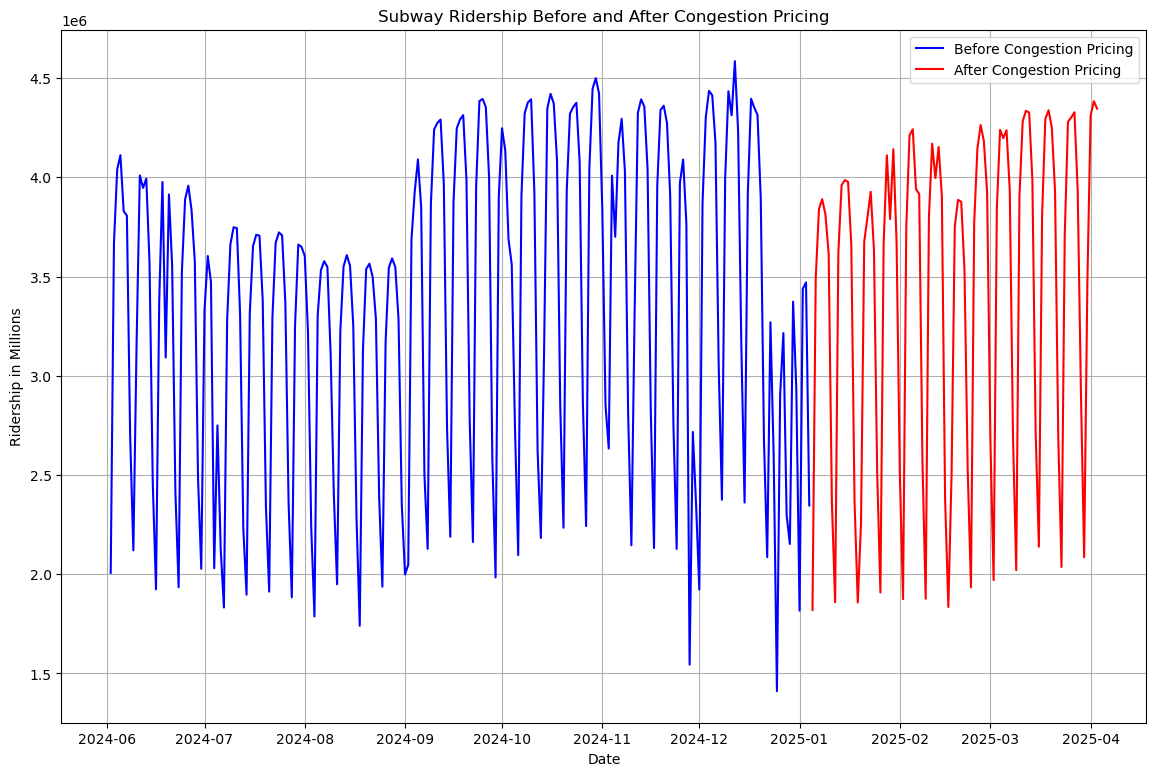

In [130]:
import matplotlib.pyplot as plt

plt.figure(figsize=(14, 9))
plt.plot(df_subways_pre_congestion_06_2024.index, df_subways_pre_congestion_06_2024.ridership, color='blue', label='Before Congestion Pricing')
plt.plot(df_subways_post_congestion.index, df_subways_post_congestion.ridership, color='red', label='After Congestion Pricing')
plt.xlabel('Date')
plt.ylabel('Ridership in Millions')
plt.title('Subway Ridership Before and After Congestion Pricing')
plt.legend()
plt.grid(True)
plt.show()

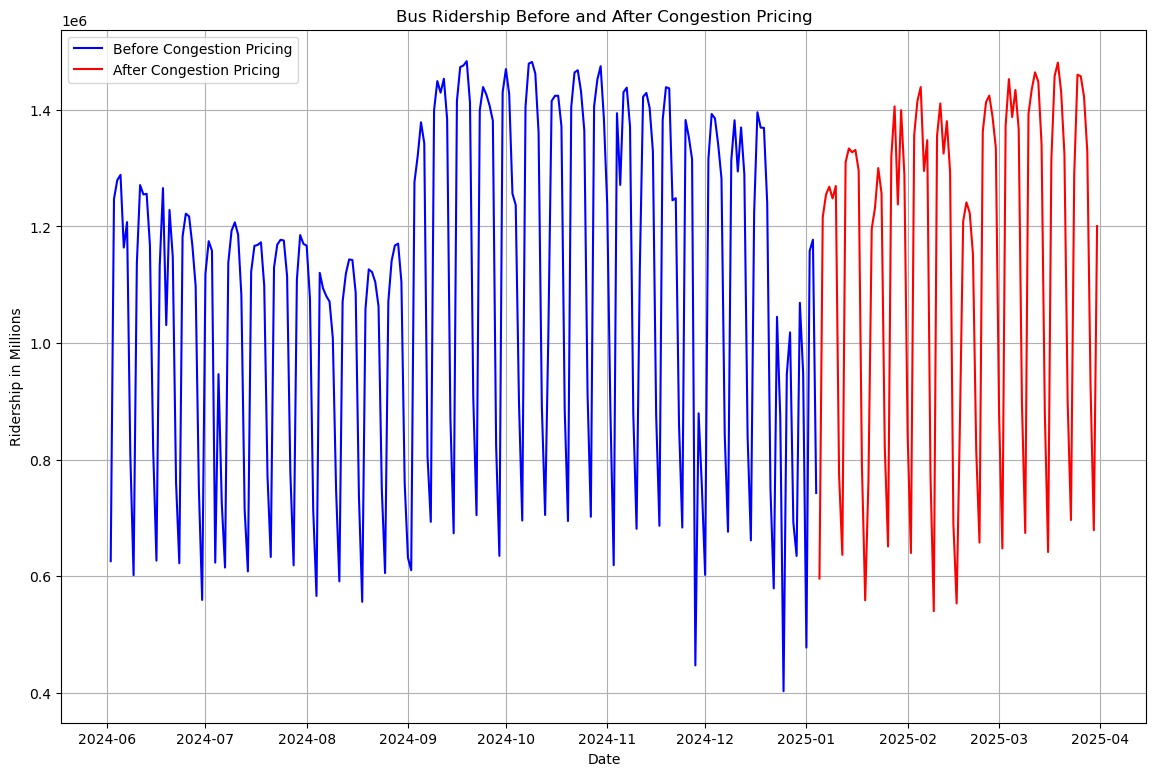

In [132]:
plt.figure(figsize=(14, 9))
plt.plot(df_buses_pre_congestion_06_2024.index, df_buses_pre_congestion_06_2024.ridership, color='blue', label='Before Congestion Pricing')
plt.plot(df_buses_post_congestion.index, df_buses_post_congestion.ridership, color='red', label='After Congestion Pricing')
plt.xlabel('Date')
plt.ylabel('Ridership in Millions')
plt.title('Bus Ridership Before and After Congestion Pricing')
plt.legend()
plt.grid(True)
plt.show()

In [134]:
# use last year's data / seasonality to predict ridership during congestion pricing
df_subways_pre_congestion_2024 = df_subways_pre_congestion[df_subways_pre_congestion.index > '2024-01-01']
df_buses_pre_congestion_2024 = df_buses_pre_congestion[df_buses_pre_congestion.index > '2024-01-01']

In [148]:
# lets SARIMA up in this 
import statsmodels.api as sm
from statsmodels.tsa.stattools import acf, pacf,adfuller
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

# subways first, test to see if requires differencing

# we know there is weekly and annual seasonality, so we will apply weekly and annual differencing
#  before we check for non-seasonal stationarity

df_subways_pre_congestion_weekly_diff = df_subways_pre_congestion.diff(periods=7)
df_subways_pre_congestion_annual_diff = df_subways_pre_congestion_weekly_diff.diff(periods=365)

result = adfuller(df_subways_pre_congestion_annual_diff.dropna().ridership)
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
    print('\t%s: %.3f' % (key, value))

ADF Statistic: -7.610416
p-value: 0.000000
Critical Values:
	1%: -3.449
	5%: -2.870
	10%: -2.571


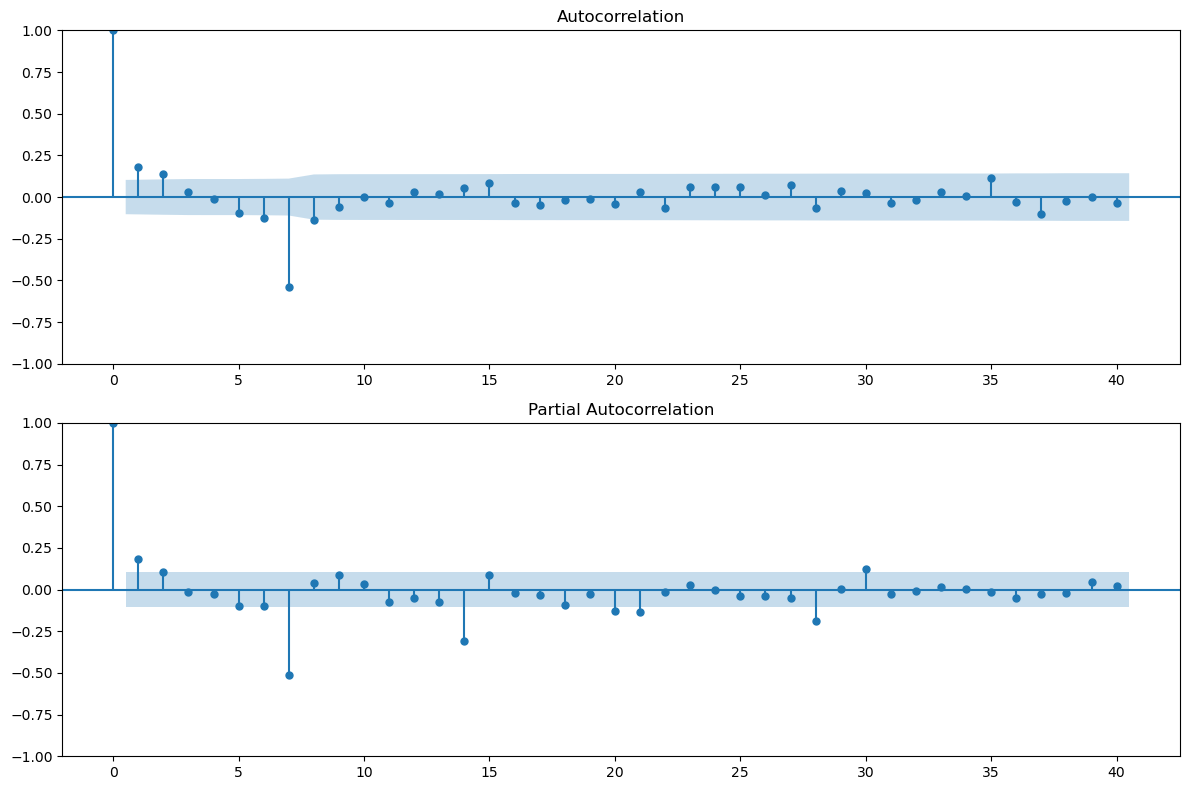

In [150]:
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(12, 8))
plot_acf(df_subways_pre_congestion_annual_diff.dropna(), lags=40, ax=ax1)
ax1.set_title('Autocorrelation')

# Partial Autocorrelation plot
plot_pacf(df_subways_pre_congestion_annual_diff.dropna(), lags=40, ax=ax2)
ax2.set_title('Partial Autocorrelation')

# Display the plots
plt.tight_layout()
plt.show()

ValueError: Can only compute partial correlations for lags up to 50% of the sample size. The requested nlags 362 must be < 181.

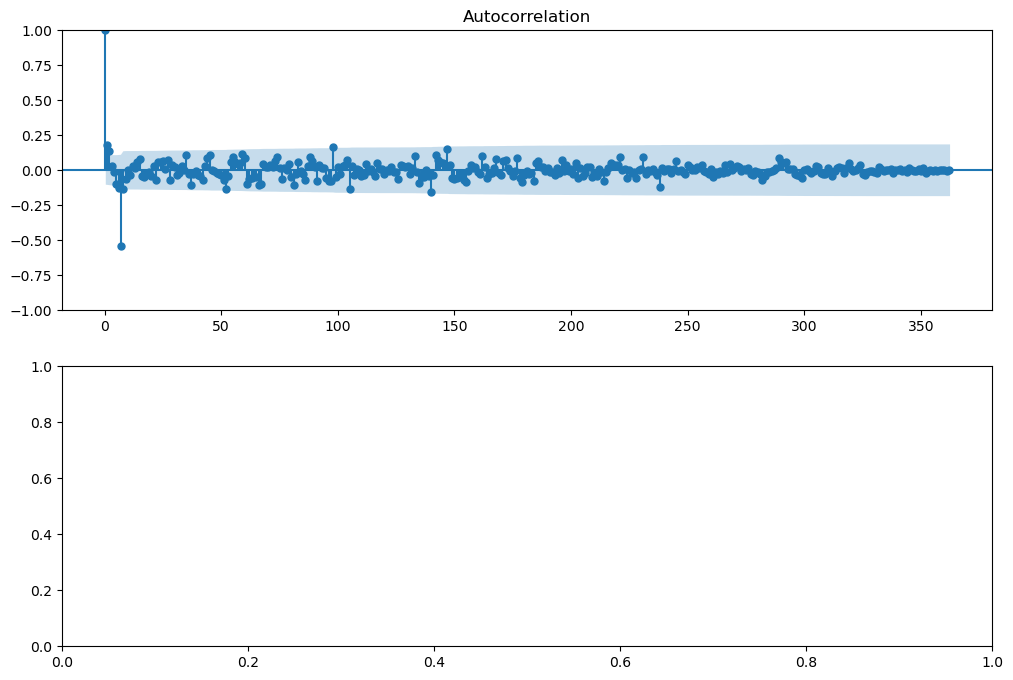

In [156]:
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(12, 8))
plot_acf(df_subways_pre_congestion_annual_diff.dropna(), lags=362, ax=ax1)
ax1.set_title('Autocorrelation')

# Partial Autocorrelation plot
plot_pacf(df_subways_pre_congestion_annual_diff.dropna(), lags=362, ax=ax2)
ax2.set_title('Partial Autocorrelation')

# Display the plots
plt.tight_layout()
plt.show()

In [196]:
# basically we are going to run the forecasting with several different iterations of orders 
#  because we are going to try multiple ways of doing this and see what happens
# "SARIMA(p,0,q)(P_w,1,Q_w,7)(P_a,1,Q_a,365)": [p, q, P_w, Q_w, P_a, Q_a]
iterations = {
    "SARIMA (1,0,0) (1,1,1,7) (1,1,0,365)": [1,0,1,1,1,0],
    "SARIMA (0,0,1) (1,1,1,7) (1,1,0,365)": [0,1,1,1,1,0],
    "SARIMA (1,0,1) (1,1,0,7) (1,1,0,365)": [1,1,1,0,1,0],
    "SARIMA (1,0,1) (0,1,1,7) (1,1,0,365)": [1,1,0,1,1,0],
    "SARIMA (1,0,1) (1,1,1,7) (1,1,0,365)": [1,1,1,1,1,0],
    "SARIMA (1,0,1) (1,1,1,7) (0,1,0,365)": [1,1,1,1,0,0],
    "SARIMA (1,0,1) (1,1,1,7) (1,1,1,365)": [1,1,1,1,1,1],
}

predictions = {}

for label, [p, q, P_w, Q_w, P_a, Q_a] in iterations.items():
    # Non-seasonal order (p, d, q) - Example values, adjust based on your data
    d = 0 # p-value of 0.00001 < 0.05 seems fine to me given we are doing SARIMA
    order = (p, d, q)
    
    # Seasonal order for weekly seasonality (P, D, Q, s=7)
    D_w = 1 # weekly seasonality
    s_w = 7
    seasonal_order_weekly = (P_w, D_w, Q_w, s_w)
    
    D_a = 1 # annual seasonality
    s_a = 365
    # Seasonal order for annual seasonality (P, D, Q, s=365)
    seasonal_order_annual = (P_a, D_a, Q_a, s_a)
    
    # specify each seasonal order separately
    model = sm.tsa.SARIMAX(df_subways_pre_congestion,
                            order=order,
                            seasonal_order=seasonal_order_weekly,
                            seasonal_order_two=seasonal_order_annual)
    
    results = model.fit(disp=False) # disp=False suppresses convergence messages
    
    # 3. Make predictions
    predictions[label] = results.predict(start='2025-01-05', end='2025-04-03')

/opt/anaconda3/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/opt/anaconda3/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/opt/anaconda3/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/opt/anaconda3/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/opt/anaconda3/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  

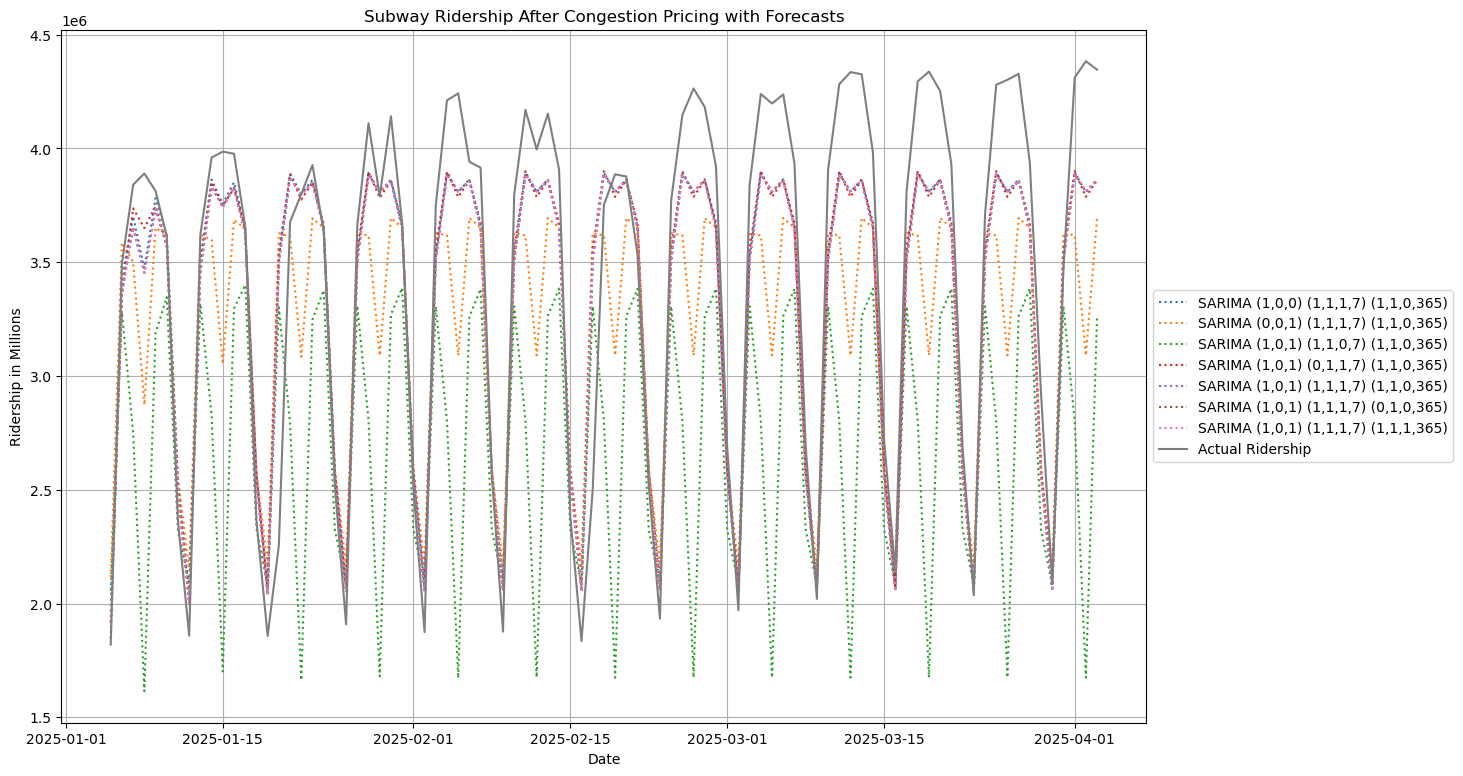

In [198]:
plt.figure(figsize=(14, 9))
for label, series in predictions.items():
    plt.plot(series.index, series.values, label=label, linestyle='dotted')

plt.plot(df_subways_post_congestion.index, df_subways_post_congestion.ridership, label='Actual Ridership')
plt.xlabel('Date')
plt.ylabel('Ridership in Millions')
plt.title('Subway Ridership After Congestion Pricing with Forecasts')
#plt.legend(loc='upper center', bbox_to_anchor=(0.25, 1.05),
          #ncol=3, fancybox=True, shadow=True)
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.grid(True)
plt.show()

In [200]:
# bus time
df_buses_pre_congestion_weekly_diff = df_buses_pre_congestion.diff(periods=7)
df_buses_pre_congestion_annual_diff = df_buses_pre_congestion_weekly_diff.diff(periods=365)

result = adfuller(df_buses_pre_congestion_annual_diff.dropna().ridership)
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
    print('\t%s: %.3f' % (key, value))

ADF Statistic: -8.772226
p-value: 0.000000
Critical Values:
	1%: -3.449
	5%: -2.870
	10%: -2.571


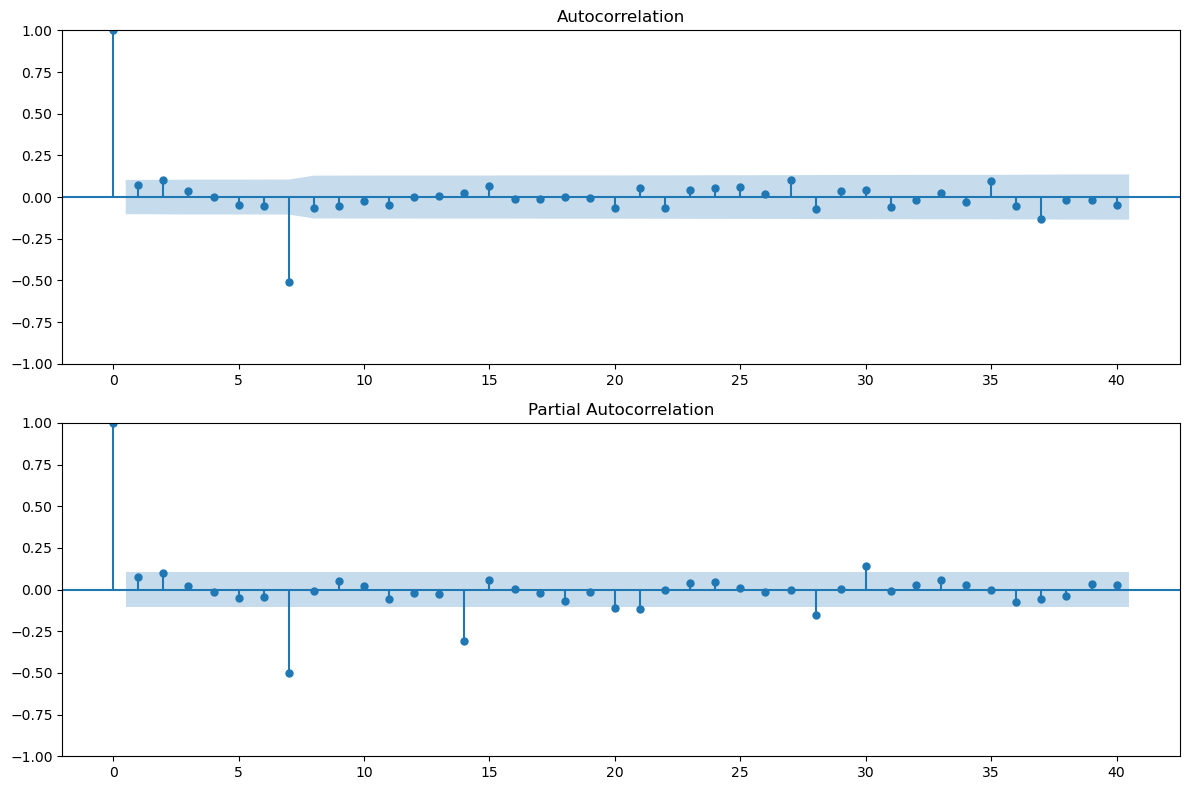

In [202]:
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(12, 8))
plot_acf(df_buses_pre_congestion_annual_diff.dropna(), lags=40, ax=ax1)
ax1.set_title('Autocorrelation')

# Partial Autocorrelation plot
plot_pacf(df_buses_pre_congestion_annual_diff.dropna(), lags=40, ax=ax2)
ax2.set_title('Partial Autocorrelation')

# Display the plots
plt.tight_layout()
plt.show()

In [208]:
predictions_buses = {}

for label, [p, q, P_w, Q_w, P_a, Q_a] in iterations.items():
    # Non-seasonal order (p, d, q) - Example values, adjust based on your data
    d = 0 # p-value of 0.00001 < 0.05 seems fine to me given we are doing SARIMA
    order = (p, d, q)
    
    # Seasonal order for weekly seasonality (P, D, Q, s=7)
    D_w = 1 # weekly seasonality
    s_w = 7
    seasonal_order_weekly = (P_w, D_w, Q_w, s_w)
    
    D_a = 1 # annual seasonality
    s_a = 365
    # Seasonal order for annual seasonality (P, D, Q, s=365)
    seasonal_order_annual = (P_a, D_a, Q_a, s_a)
    
    # specify each seasonal order separately
    model = sm.tsa.SARIMAX(df_buses_pre_congestion,
                            order=order,
                            seasonal_order=seasonal_order_weekly,
                            seasonal_order_two=seasonal_order_annual)
    
    results = model.fit(disp=False) # disp=False suppresses convergence messages
    
    # 3. Make predictions
    predictions_buses[label] = results.predict(start='2025-01-05', end='2025-03-31')

/opt/anaconda3/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/opt/anaconda3/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/opt/anaconda3/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/opt/anaconda3/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/opt/anaconda3/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  

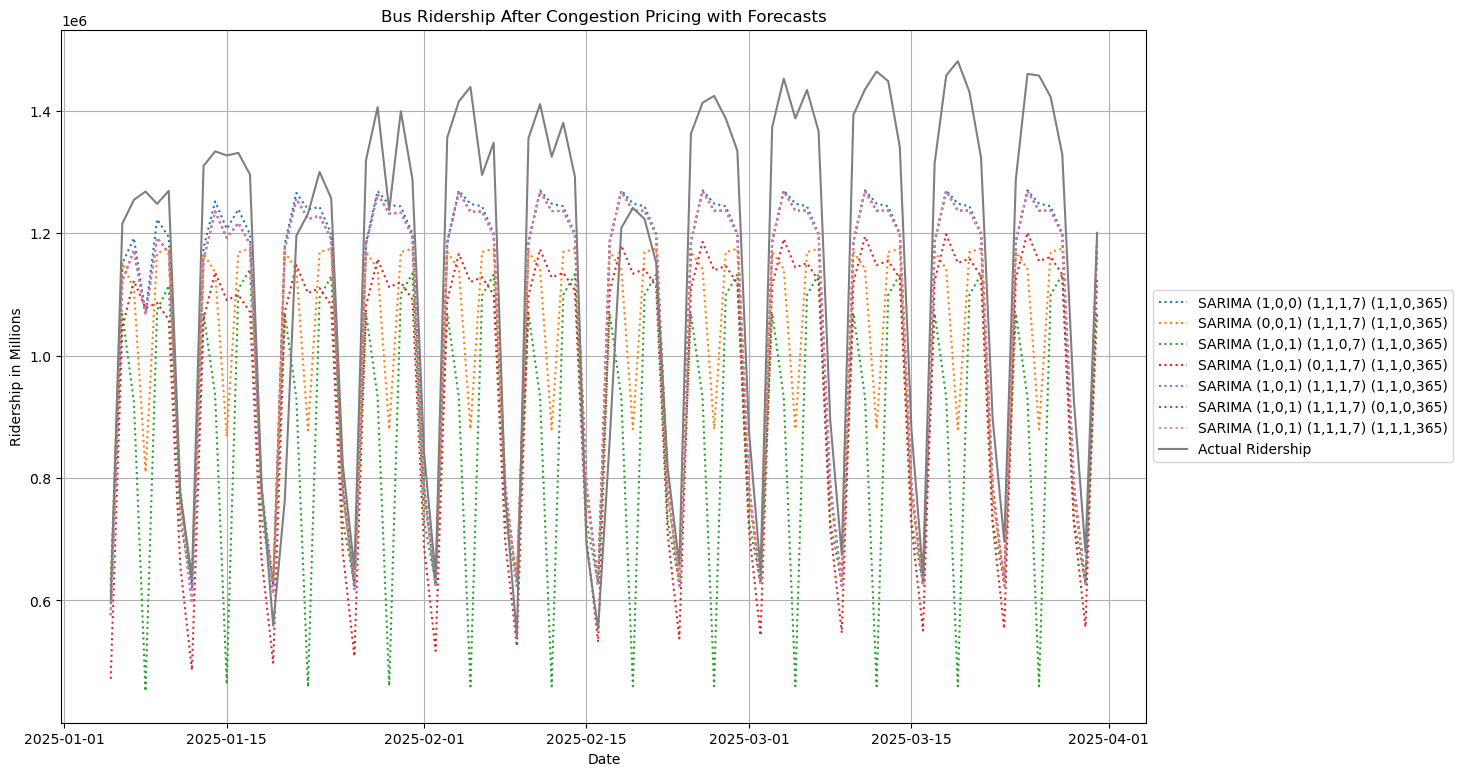

In [210]:
plt.figure(figsize=(14, 9))
for label, series in predictions_buses.items():
    plt.plot(series.index, series.values, label=label, linestyle='dotted')

plt.plot(df_buses_post_congestion.index, df_buses_post_congestion.ridership, label='Actual Ridership')
plt.xlabel('Date')
plt.ylabel('Ridership in Millions')
plt.title('Bus Ridership After Congestion Pricing with Forecasts')
#plt.legend(loc='upper center', bbox_to_anchor=(0.25, 1.05),
          #ncol=3, fancybox=True, shadow=True)
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.grid(True)
plt.show()

In [220]:
# now lets run some tests to see if the actual ridership is statistically significantly different from the forecasts
from scipy import stats

print('Actual Subway Ridership vs SARIMA Distribution Tests')
for label, series in predictions.items():
    t_result = stats.ttest_ind(series.values, df_subways_post_congestion.ridership)
    ks_result = stats.ks_2samp(series.values, df_subways_post_congestion.ridership)
    print(f'{label}: t-test p-value of {t_result.pvalue}')
    print(f'{label}: ks-test p-value of {ks_result.pvalue}')
    print()

print('Actual Bus Ridership vs SARIMA Distribution Tests')
for label, series in predictions_buses.items():
    t_result = stats.ttest_ind(series.values, df_buses_post_congestion.ridership)
    ks_result = stats.ks_2samp(series.values, df_buses_post_congestion.ridership)
    print(f'{label}: t-test p-value of {t_result.pvalue}')
    print(f'{label}: ks-test p-value of {ks_result.pvalue}')
    print()

Actual Subway Ridership vs SARIMA Distribution Tests
SARIMA (1,0,0) (1,1,1,7) (1,1,0,365): t-test p-value of 0.29144517914606605
SARIMA (1,0,0) (1,1,1,7) (1,1,0,365): ks-test p-value of 1.1663298328965152e-07

SARIMA (0,0,1) (1,1,1,7) (1,1,0,365): t-test p-value of 0.019097388033122414
SARIMA (0,0,1) (1,1,1,7) (1,1,0,365): ks-test p-value of 2.0861742583586648e-14

SARIMA (1,0,1) (1,1,0,7) (1,1,0,365): t-test p-value of 9.103420627423285e-11
SARIMA (1,0,1) (1,1,0,7) (1,1,0,365): ks-test p-value of 5.801808735864582e-21

SARIMA (1,0,1) (0,1,1,7) (1,1,0,365): t-test p-value of 0.3063795128836654
SARIMA (1,0,1) (0,1,1,7) (1,1,0,365): ks-test p-value of 1.1663298328965152e-07

SARIMA (1,0,1) (1,1,1,7) (1,1,0,365): t-test p-value of 0.24057962100338817
SARIMA (1,0,1) (1,1,1,7) (1,1,0,365): ks-test p-value of 4.6470954279470525e-08

SARIMA (1,0,1) (1,1,1,7) (0,1,0,365): t-test p-value of 0.24057962100338817
SARIMA (1,0,1) (1,1,1,7) (0,1,0,365): ks-test p-value of 4.6470954279470525e-08

SARI

In [ ]:
# plot the timeline of actual subway and bus usage during our current congestion pricing window for last 2 years
